## Identify Handwritten numbers using Tensorflow using MNIST dataset

#### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

You can find a docker image here: https://hub.docker.com/r/tensorflow/tensorflow/

In [13]:
import numpy as np
import matplotlib.pyplot as plt #Matplotlib to create inline plots
%matplotlib inline
import tensorflow as tf # Import tensorflow to train the inception model to classify the image
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

#### Import Dataset

In [14]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images # training data
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


To make the model faster, we might want to limit the size to make it run faster

In [15]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

### Display some digits

In [16]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)

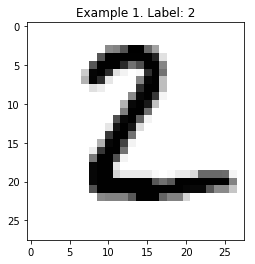

In [17]:
display(1)

The above image is clearly a 2, but the next one is harder to recognize

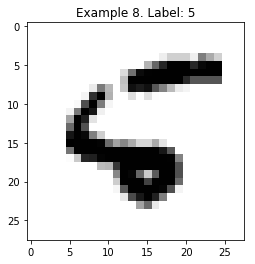

In [18]:
display(8)

In images, since we dont have any features or input variables, we divide each image into a 28 x 28 pixel image. Each pixel is now a feature.

In [19]:
print "we have",len(data[0]),"Pixels or features or variables for each image"

we have 784 Pixels or features or variables for each image


In this case, we will be building a linear classifier to help classify the image. The way this works is as follows:  
  
1) We have 0 to 9 as the outputs  
2) Each output has 784 input pixels  
3) Each pixel is associated with a certain amount of weight that is unique to a digit  
4) For Example:  
     Number 1 : Pixel 2 x 3 has a weight of 0.8  
     Number 4 : Pixel 2 x 3 has a weight of only 0.1  
5) As we gather more pixel weights and add them up, we see that each number has a unique foot print that more or less remains the same no matter how the number is written  

## Fit a Linear Classifier

In [21]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'gradient_clip_norm': None, 'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f0fe433c9d0>, 'joint_weights': False, 'optimizer': None, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)]})

## Evaluate Accuracy

In [22]:
classifier.evaluate(test_data, test_labels)
print classifier.evaluate(test_data, test_labels)["accuracy"]

0.9137
